array([[<Axes: title={'center': '2022年'}>,
        <Axes: title={'center': '2021年'}>,
        <Axes: title={'center': '2020年'}>,
        <Axes: title={'center': '2019年'}>],
       [<Axes: title={'center': '2018年'}>,
        <Axes: title={'center': '2017年'}>,
        <Axes: title={'center': '2016年'}>,
        <Axes: title={'center': '2015年'}>],
       [<Axes: title={'center': '2014年'}>,
        <Axes: title={'center': '2013年'}>,
        <Axes: title={'center': '2012年'}>,
        <Axes: title={'center': '2011年'}>],
       [<Axes: title={'center': '2010年'}>,
        <Axes: title={'center': '2009年'}>,
        <Axes: title={'center': '2008年'}>,
        <Axes: title={'center': '2007年'}>],
       [<Axes: title={'center': '2006年'}>,
        <Axes: title={'center': '2005年'}>,
        <Axes: title={'center': '2004年'}>,
        <Axes: title={'center': '2003年'}>]], dtype=object)

E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


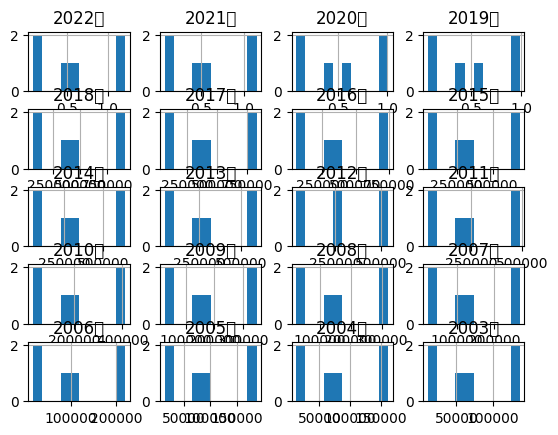

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

# 读取数据
df1 = pd.read_csv('GDP年度数据 (2).csv', encoding="GBK")

df1.hist()


array([[<Axes: title={'center': '年份'}>,
        <Axes: title={'center': '能源消费总量'}>],
       [<Axes: title={'center': '煤炭'}>, <Axes: title={'center': '石油'}>],
       [<Axes: title={'center': '天然气'}>,
        <Axes: title={'center': '一次电力及其他能源'}>]], dtype=object)

E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\python\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  func(*args, **kwargs)
E:\python_self_file\pyhthon\py

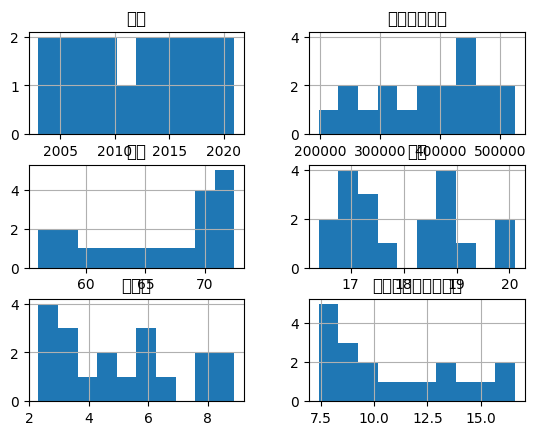

In [46]:
df = pd.read_csv('能源消费总量及构成.csv', encoding="GBK")
df.hist()

In [40]:
x = df['煤炭']
x = x.drop(18, axis=0)

y = df1.loc[df1["指标"] == "第二产业增加值(亿元)", :]
x

0     70.2
1     70.2
2     72.4
3     72.4
4     72.5
5     71.5
6     71.6
7     69.2
8     70.2
9     68.5
10    67.4
11    65.8
12    63.8
13    62.2
14    60.6
15    59.0
16    57.7
17    56.9
Name: 煤炭, dtype: float64

In [41]:
y = y.drop(['2021年'], axis=1)
y = y.drop(['2022年'], axis=1)
y = y.drop(['指标'], axis=1)
y

,2020年,2019年,2018年,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年
3,383562.4,380670.6,364835.2,331580.5,295427.8,281338.9,277282.8,261951.6,244639.1,227035.1,191626.5,160168.8,149952.9,126630.5,104359.2,88082.2,74285.0,62695.8


In [42]:
# 去除数据
# for i in range(20):
#     x = x.drop([i], axis=0)
# x

In [43]:
x = list(x)
x = np.array(x).reshape(-1, 1)
y_ = []
for index, row in y.iterrows():
    for column in row:
        y_.append(column)
y = y_
y = np.array(y).reshape(-1, 1)
# 处理y
y

array([[383562.4],
       [380670.6],
       [364835.2],
       [331580.5],
       [295427.8],
       [281338.9],
       [277282.8],
       [261951.6],
       [244639.1],
       [227035.1],
       [191626.5],
       [160168.8],
       [149952.9],
       [126630.5],
       [104359.2],
       [ 88082.2],
       [ 74285. ],
       [ 62695.8]])

0.6704811679803697


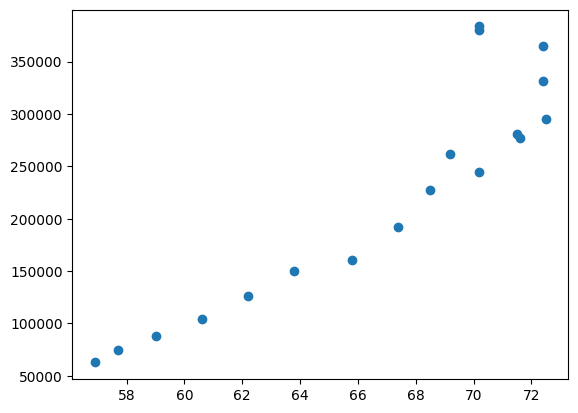

In [44]:
from sklearn.metrics import r2_score

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(r2_score(Y_test, Y_pred))
# 绘制展测概率图
plt.scatter(x, y)
plt.show()


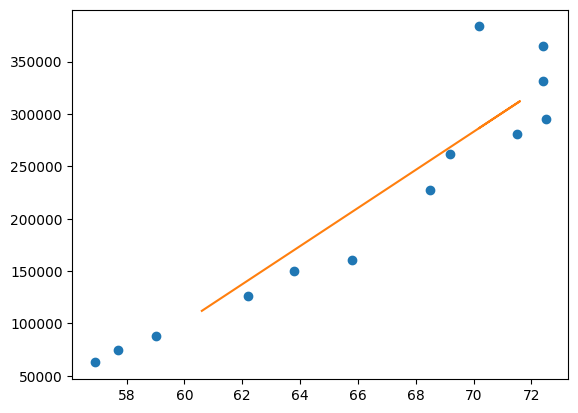

In [45]:
import matplotlib.pyplot as plt
plt.plot(X_train, Y_train, 'o')
plt.plot(X_test, Y_pred, '-')
plt.show()